In [14]:
%matplotlib inline

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
time = ctrl.Antecedent(np.arange(0, 25, 1), 'time')
red = ctrl.Consequent(np.arange(0, 1024, 1), 'red')
green = ctrl.Consequent(np.arange(0, 1024, 1), 'green')
blue = ctrl.Consequent(np.arange(0, 1024, 1), 'blue')

# Auto-membership function population is possible with .automf(3, 5, or 7)
red.automf(3)
green.automf(3)
blue.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
time['morning'] = fuzz.trimf(time.universe, [0, 6, 12])
time['noon'] = fuzz.trimf(time.universe, [6, 12, 18])
time['evening'] = fuzz.trimf(time.universe, [13, 18, 25])
time['night'] = fuzz.trimf(time.universe, [18, 25, 25])

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


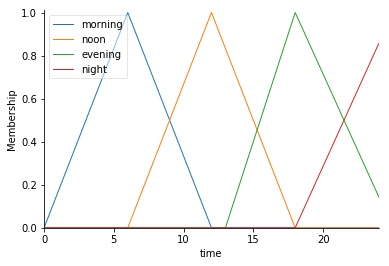

In [16]:
time.view()

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


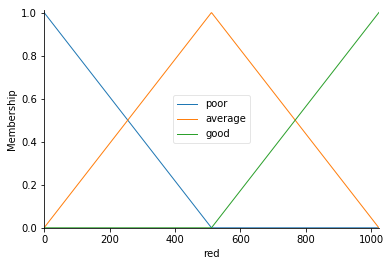

In [17]:
red.view()

In [31]:
rule4b = ctrl.Rule(time['night'], blue['poor'])
rule4r = ctrl.Rule(time['night'], red['poor'])
rule4g = ctrl.Rule(time['night'], green['poor'])
rule1b = ctrl.Rule(time['morning'], blue['good'])
rule1r = ctrl.Rule(time['morning'], red['average'])
rule1g = ctrl.Rule(time['morning'], green['poor'])
rule2r = ctrl.Rule(time['noon'], red['good'])
rule2g = ctrl.Rule(time['noon'], green['good'])
rule2b = ctrl.Rule(time['noon'], blue['good'])
rule3r = ctrl.Rule(time['evening'], red['good'])
rule3g = ctrl.Rule(time['evening'], green['poor'])
rule3b = ctrl.Rule(time['evening'], blue['average'])

#rule1.view()

In [32]:
b_ctrl = ctrl.ControlSystem([rule1b, rule2b, rule3b, rule4b])
amoumt_b = ctrl.ControlSystemSimulation(b_ctrl)

r_ctrl = ctrl.ControlSystem([rule1r, rule2r, rule3r, rule4r])
amoumt_r = ctrl.ControlSystemSimulation(r_ctrl)

g_ctrl = ctrl.ControlSystem([rule1g, rule2g, rule3g, rule4g])
amoumt_g = ctrl.ControlSystemSimulation(g_ctrl)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


824.082935086 540.816146744 583.550029476


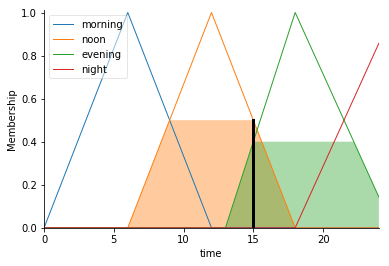

In [46]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
hour=15
amount_r.input['time'] = hour
amount_g.input['time'] = hour
amount_b.input['time'] = hour

# Crunch the numbers
amount_r.compute()
amount_g.compute()
amount_b.compute()


time.view(sim=amount_r)
#print(amount_r.output)
print(amount_r.output['red'], 
     amount_g.output['green'],
     amount_b.output['blue'])

In [21]:
blue['poor']&red['poor']

blue[poor] AND red[poor]

In [22]:
help(color)

Help on ControlSystemSimulation in module skfuzzy.control.controlsystem object:

class ControlSystemSimulation(builtins.object)
 |  Calculate results from a ControlSystem.
 |  
 |  Parameters
 |  ----------
 |  control_system : ControlSystem
 |      A fuzzy ControlSystem object.
 |  clip_to_bounds : bool, optional
 |      Controls if input values should be clipped to the consequent universe
 |      range. Default is True.
 |  cache : bool, optional
 |      Controls if results should be stored for reference in fuzzy variable
 |      objects, allowing fast lookup for repeated runs of `.compute()`.
 |      Unless you are heavily memory constrained leave this `True` (default).
 |  flush_after_run : int, optional
 |      Clears cached results after this many repeated, unique simulations.
 |      The default of 1000 is appropriate for most hardware, but for small
 |      embedded systems this can be lowered as appropriate. Higher memory
 |      systems may see better performance with a highe

In [27]:
red.accumulation_method()

ValueError: invalid number of arguments